# Gradient Boosting

In [1]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
import pandas as pd
from joblib import dump
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import sys
sys.path.append('F:\\Users\\Manuel García Plaza\\Desktop\\TFG\\')

In [3]:
from notebooks.utils.classification_metrics import classification

In [2]:
train =  pd.read_parquet('../../../data/model_input/train_sets/car_insurance.parquet')
validation =  pd.read_parquet('../../../data/model_input/validation_sets/car_insurance.parquet')

In [3]:
y_train = train.OUTCOME
X_train = train.drop(columns=['OUTCOME'])

In [4]:
y_validation = validation.OUTCOME
X_validation = validation.drop(columns=['OUTCOME'])

In [7]:
exploratory_depths =[2, 3, 4, 5]
exploratory_estimators = [10, 25, 50, 75, 100, 200]
exploratory_learn_rate = [0.01, 0.05, 0.1, 0.5]

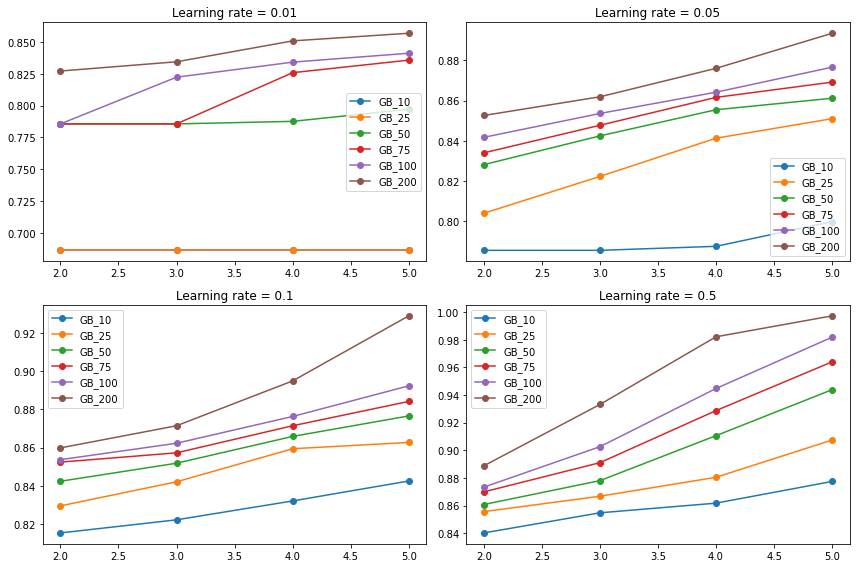

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

for n in exploratory_estimators:
    axs[0, 0].plot(exploratory_depths, [GradientBoostingClassifier(n_estimators=n, max_depth=i, learning_rate=exploratory_learn_rate[0]).fit(X_train, y_train).score(X_train, y_train) for i in exploratory_depths], 
             marker= 'o', label='GB_'+str(n))
    axs[0, 1].plot(exploratory_depths, [GradientBoostingClassifier(n_estimators=n, max_depth=i, learning_rate=exploratory_learn_rate[1]).fit(X_train, y_train).score(X_train, y_train) for i in exploratory_depths], 
             marker= 'o', label='GB_'+str(n))
    axs[1, 0].plot(exploratory_depths, [GradientBoostingClassifier(n_estimators=n, max_depth=i, learning_rate=exploratory_learn_rate[2]).fit(X_train, y_train).score(X_train, y_train) for i in exploratory_depths], 
             marker= 'o', label='GB_'+str(n))
    axs[1, 1].plot(exploratory_depths, [GradientBoostingClassifier(n_estimators=n, max_depth=i, learning_rate=exploratory_learn_rate[3]).fit(X_train, y_train).score(X_train, y_train) for i in exploratory_depths], 
             marker= 'o', label='GB_'+str(n))
    
axs[0, 0].set_title('Learning rate = '+str(exploratory_learn_rate[0]))
axs[0, 0].legend()
axs[0, 1].set_title('Learning rate = '+str(exploratory_learn_rate[1]))
axs[0, 1].legend()
axs[1, 0].set_title('Learning rate = '+str(exploratory_learn_rate[2]))
axs[1, 0].legend()
axs[1, 1].set_title('Learning rate = '+str(exploratory_learn_rate[3]))
axs[1, 1].legend()

plt.tight_layout()
plt.show()

In [10]:
max_depth = [3, 4, 5, 6]
n_estimators = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
learn_rate = [0.01, 0.05, 0.1, 0.2, 0.5, 0.7]

In [11]:
models_list = []
names_list = []
for n in n_estimators:
    for d in max_depth:
        for l in learn_rate:
            models_list.append(GradientBoostingClassifier(n_estimators=n, max_depth=d, learning_rate=l))
            names_list.append('GB_'+str(n)+'_'+str(d)+'_'+str(l))

In [12]:
metrics = classification(models_list, names_list, '../../../data/model_output/metrics/car_insurance/gradient_boosting.csv', X_train, y_train, X_validation, y_validation, metrics={})
metrics

,Run_Time,Train_AUC,Validation_AUC,delta%
GB_50_3_0.01,0.645680,0.889830,0.884365,-0.614153
GB_50_3_0.05,0.741988,0.916879,0.909734,-0.779265
GB_50_3_0.1,0.704915,0.925554,0.916590,-0.968452
GB_50_3_0.2,0.748998,0.932341,0.919256,-1.403465
GB_50_3_0.5,0.663633,0.945782,0.915940,-3.155371
...,...,...,...,...
GB_500_6_0.05,11.174997,0.996384,0.911578,-8.511367
GB_500_6_0.1,11.159572,0.999854,0.904295,-9.557275
GB_500_6_0.2,11.933365,0.999999,0.902592,-9.740749
GB_500_6_0.5,11.263542,1.000000,0.895470,-10.452980


In [13]:
metrics[metrics['delta%']>-10].sort_values(by='Validation_AUC', ascending=False)

,Run_Time,Train_AUC,Validation_AUC,delta%
GB_200_3_0.1,2.513873,0.941969,0.920857,-2.241318
GB_150_3_0.1,1.955611,0.937691,0.920748,-1.806898
GB_250_3_0.05,3.137557,0.935440,0.920732,-1.572263
GB_300_3_0.05,3.644254,0.937803,0.920582,-1.836323
GB_150_4_0.05,2.471388,0.939681,0.920542,-2.036687
...,...,...,...,...
GB_250_3_0.5,3.207085,0.985783,0.894328,-9.277408
GB_150_3_0.01,1.919885,0.902475,0.894216,-0.915168
GB_200_3_0.7,2.584553,0.984891,0.890660,-9.567660
GB_100_3_0.01,1.331709,0.896970,0.890355,-0.737384


**GB_200_3_0.1** is the best model we got.

In [5]:
test = pd.read_parquet('../../../data/model_input/test_sets/car_insurance.parquet')

In [6]:
y_test = test.OUTCOME
X_test = test.drop(columns=['OUTCOME'])

In [7]:
retrain = pd.concat([train, validation])

In [8]:
y_retrain = retrain.OUTCOME
X_retrain = retrain.drop(columns=['OUTCOME'])

In [18]:
model = GradientBoostingClassifier(n_estimators=200, max_depth=3, learning_rate=0.1).fit(X_retrain, y_retrain)

In [19]:
test_pred = model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, test_pred)
print('Test AUC:', round(auc, 4))

Test AUC: 0.9287


Good, we obtained better results

In [20]:
dump(model, '../../../data/model_output/models/car_insurance/best_gradient_boosting.joblib')

['best_gradient_boosting.joblib']

In [21]:
with open('../../../data/model_output/metrics/car_insurance/final_AUC.txt', 'a') as f:
    f.write('\nGB, '+ str(auc))

In [9]:
from joblib import load
load_mod = load('../../../data/model_output/models/car_insurance/best_gradient_boosting.joblib')

In [10]:
train_pred = load_mod.predict_proba(X_retrain)[:, 1]
auc_train = roc_auc_score(y_retrain, train_pred)
test_pred = load_mod.predict_proba(X_test)[:, 1]
auc_test = roc_auc_score(y_test, test_pred)

In [11]:
import time 
time1 = time.time()
GradientBoostingClassifier(n_estimators=200, max_depth=3, learning_rate=0.1).fit(X_retrain, y_retrain)
time2 = time.time() - time1 

In [12]:
with open('../../../data/model_output/metrics/car_insurance/final_metrics.txt', 'a') as f:
     f.write(f'\nGB; {time2}; {auc_train}; {auc_test}')